# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/mk823-dev/Dissertation-Project-Final/main/Twitter_Data%20(1).csv')
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# Data Cleaning and Preprocessing

In [3]:


def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.lower()
        return text
    else:
        return ""

df['clean_text'] = df['clean_text'].apply(clean_text)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manavkumar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manavkumar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manavkumar/nltk_data...


,clean_text,category,processed_text
0,when modi promised minimum government maximum ...,-1.0,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


# Feature Extraction

In [4]:

tfidf = TfidfVectorizer(max_features=5000)

df.dropna(subset=['category'], inplace=True)

X = tfidf.fit_transform(df['processed_text'])


y = df['category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [ ]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate models
print("Naive Bayes Model Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder


logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()

# Train Logistic Regression
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))


# Train Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7635294117647059
              precision    recall  f1-score   support

          -1       0.80      0.56      0.66       372
           0       0.76      0.81      0.78       613
           1       0.75      0.83      0.79       715

    accuracy                           0.76      1700
   macro avg       0.77      0.73      0.75      1700
weighted avg       0.77      0.76      0.76      1700

[[210  63  99]
 [ 23 497  93]
 [ 29  95 591]]
Random Forest Accuracy: 0.7505882352941177
              precision    recall  f1-score   support

          -1       0.81      0.50      0.62       372
           0       0.73      0.85      0.79       613
           1       0.75      0.80      0.77       715

    accuracy                           0.75      1700
   macro avg       0.76      0.72      0.73      1700
weighted avg       0.76      0.75      0.74      1700

[[186  78 108]
 [ 12 521  80]
 [ 31 115 569]]


In [ ]:
# SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))



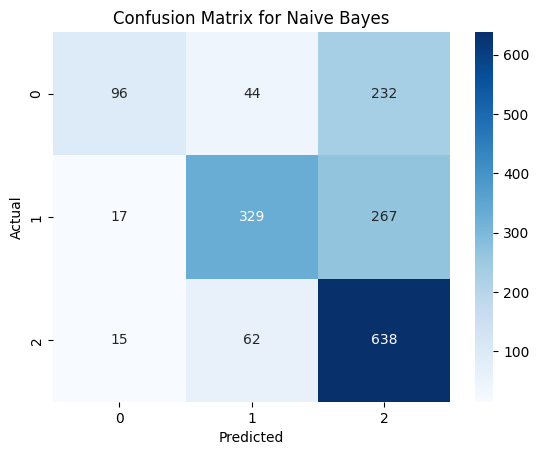

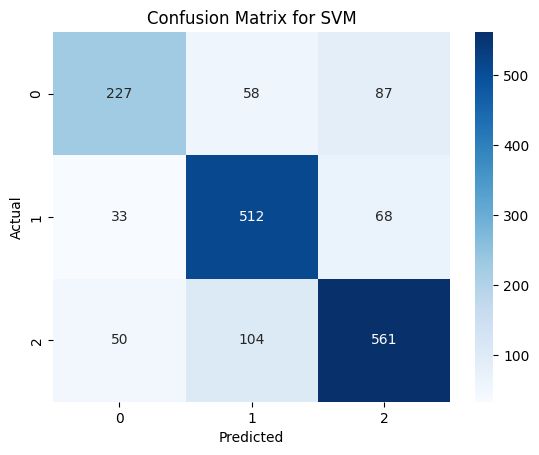

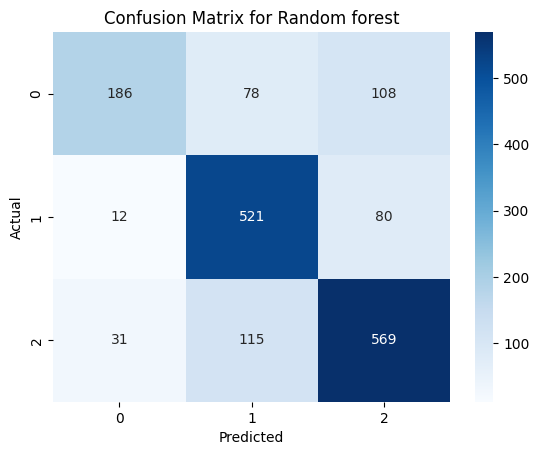

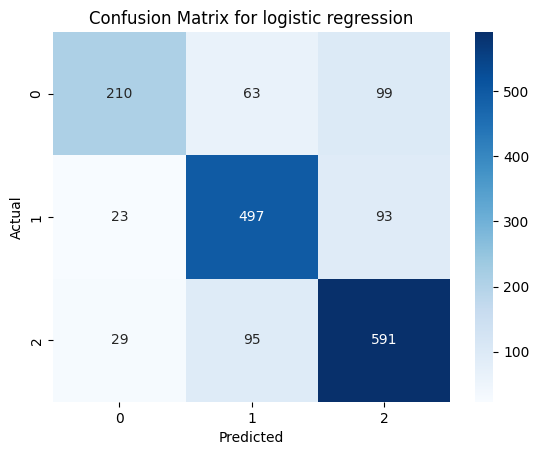

In [8]:

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_rm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_lr = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/Twitter_Data 1 - Copy.csv')
df.head()

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.lower()
        return text
    else:
        return ""

df['clean_text'] = df['clean_text'].apply(clean_text)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess_text)

df.head()

tfidf = TfidfVectorizer(max_features=5000)

df.dropna(subset=['category'], inplace=True)

X = tfidf.fit_transform(df['processed_text'])

y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize DistilBERT tokenizer and model (faster and smaller than BERT)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

def encode_texts(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors="tf", max_length=128)

train_encodings = encode_texts(df['processed_text'])
train_labels = df['category'].values


label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)


train_labels = tf.constant(train_labels, dtype=tf.int64)
dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).shuffle(100).batch(16)  # Reduce batch size

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
distilbert_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


distilbert_model.fit(dataset, epochs=1)

test_encodings = encode_texts(df['processed_text'])
test_labels = df['category'].values
test_labels = label_encoder.transform(test_labels)
test_labels = tf.constant(test_labels, dtype=tf.int64)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(16)  # Match batch size

distilbert_model.evaluate(test_dataset)


# Analysis

In [ ]:

predictions = distilbert_model.predict(test_dataset)
bert_pred = tf.argmax(predictions.logits, axis=1).numpy()

In [ ]:
print("Classification Report for bert:\n", classification_report(test_labels, bert_pred, target_names=[str(c) for c in label_encoder.classes_]))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, bert_pred)
print("Confusion Matrix:\n", conf_matrix)

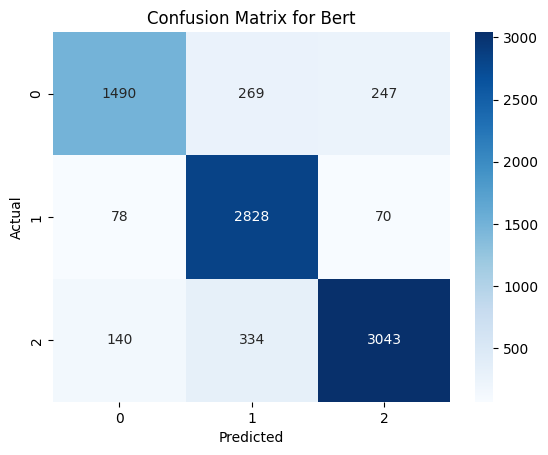

In [ ]:

cm_bert = confusion_matrix(test_labels, bert_pred)
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bert')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Text Length Analysis

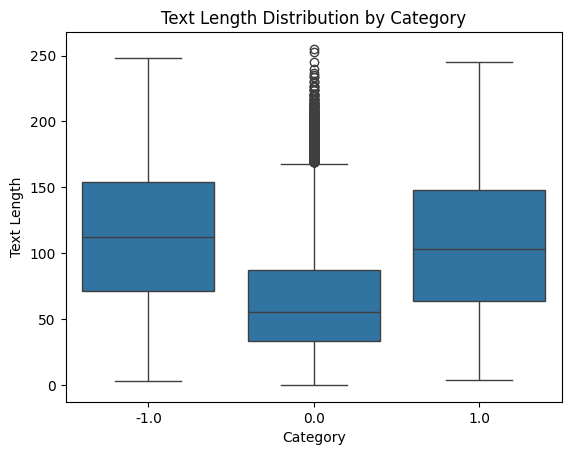

In [ ]:

df['text_length'] = df['processed_text'].apply(len)


import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='category', y='text_length', data=df)
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.title('Text Length Distribution by Category')
plt.show()


# Word Cloud Visualization

Word Cloud for Category -1.0


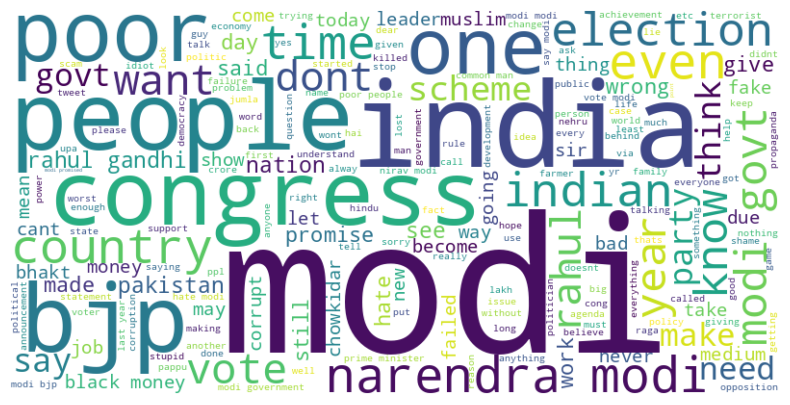

Word Cloud for Category 0.0


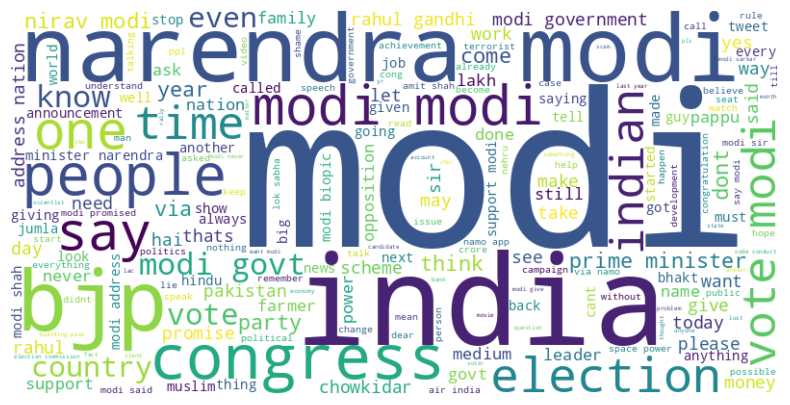

Word Cloud for Category 1.0


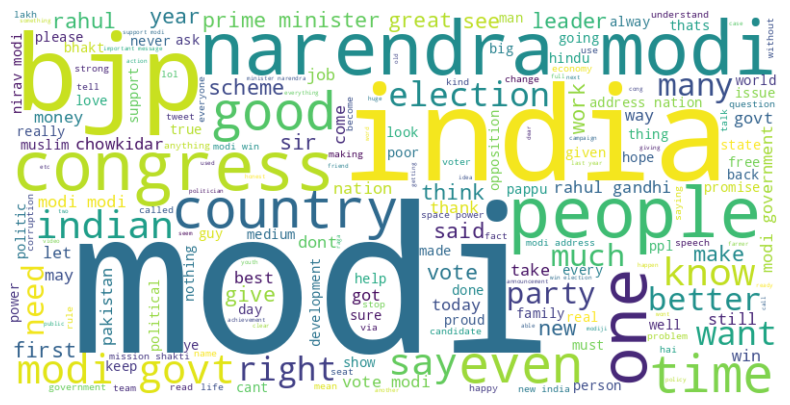

In [ ]:
from wordcloud import WordCloud


def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


for category in df['category'].unique():
    text = ' '.join(df[df['category'] == category]['processed_text'])
    print(f'Word Cloud for Category {category}')
    generate_wordcloud(text)


# Sentiment Distribution Analysis

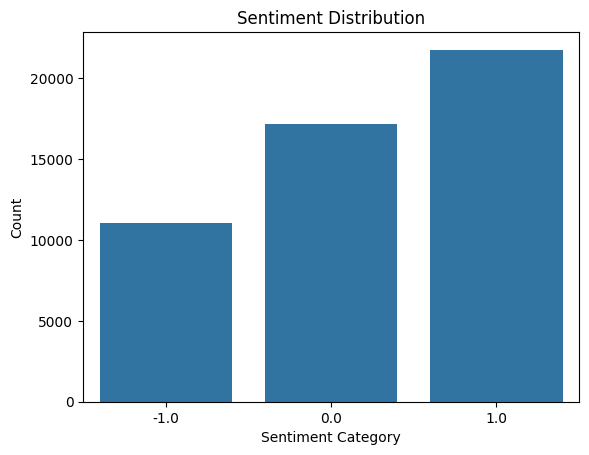

In [ ]:

sns.countplot(x='category', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


# Top N-Grams Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


top_unigrams = get_top_ngrams(df['processed_text'], n=10, ngram_range=(1, 1))
top_bigrams = get_top_ngrams(df['processed_text'], n=10, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(df['processed_text'], n=10, ngram_range=(3, 3))


print("Top Unigrams:", top_unigrams)
print("Top Bigrams:", top_bigrams)
print("Top Trigrams:", top_trigrams)


Top Unigrams: [('modi', 47219), ('india', 9738), ('bjp', 4843), ('people', 4409), ('like', 4038), ('congress', 3792), ('vote', 3735), ('narendra', 3570), ('election', 3509), ('govt', 3110)]
Top Bigrams: [('narendra modi', 3257), ('modi govt', 1699), ('prime minister', 1168), ('rahul gandhi', 1127), ('vote modi', 1071), ('modi government', 936), ('address nation', 690), ('nirav modi', 662), ('like modi', 652), ('modi modi', 548)]
Top Trigrams: [('prime minister narendra', 400), ('minister narendra modi', 391), ('modi address nation', 350), ('via namo app', 317), ('lok sabha election', 186), ('low earth orbit', 172), ('modi amit shah', 166), ('shri narendra modi', 142), ('narendra modi address', 140), ('prime minister modi', 127)]


# Model Training and Evaluation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


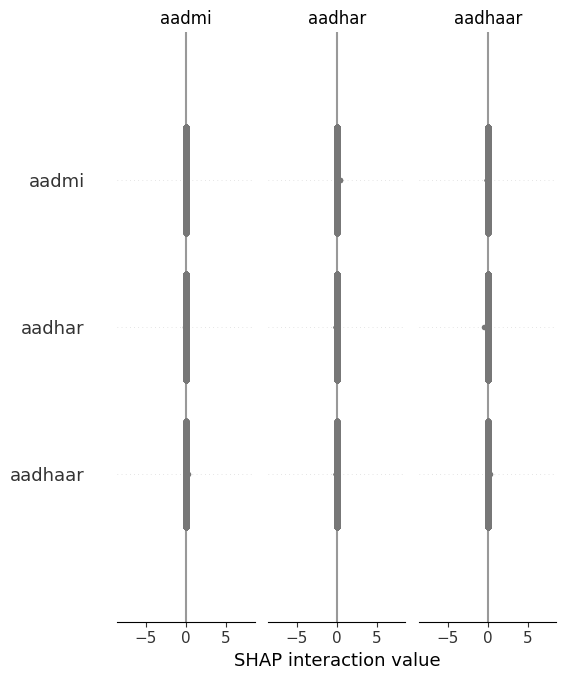

In [ ]:
!pip install shap
import shap


logreg.fit(X_train, y_train)
explainer = shap.LinearExplainer(logreg, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=tfidf.get_feature_names_out())

In [ ]:

sentiment_distribution = df['category'].value_counts(normalize=True) * 100

print("Sentiment Distribution (%):")
print(sentiment_distribution)

Sentiment Distribution (%):
category
 1.0    43.523741
 0.0    34.389376
-1.0    22.086883
Name: proportion, dtype: float64


In [ ]:

category_sentiment_distribution = df.groupby('category')['clean_text'].count()

print("Sentiment Distribution by Category:")
print(category_sentiment_distribution)


Sentiment Distribution by Category:
category
-1.0    11043
 0.0    17194
 1.0    21761
Name: clean_text, dtype: int64


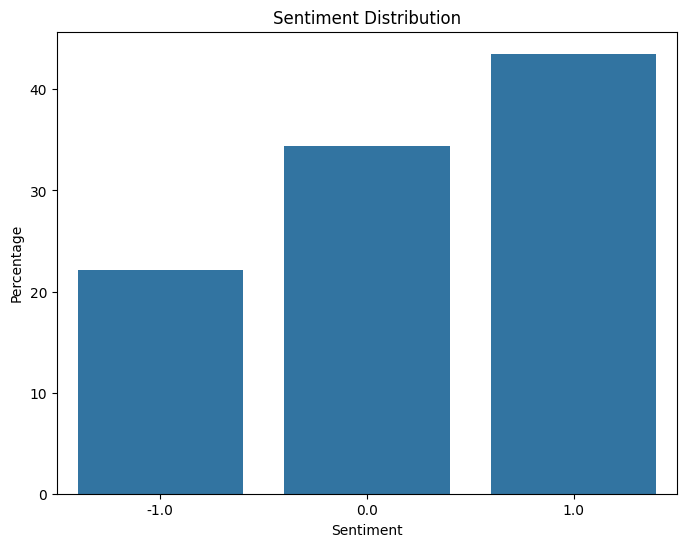

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


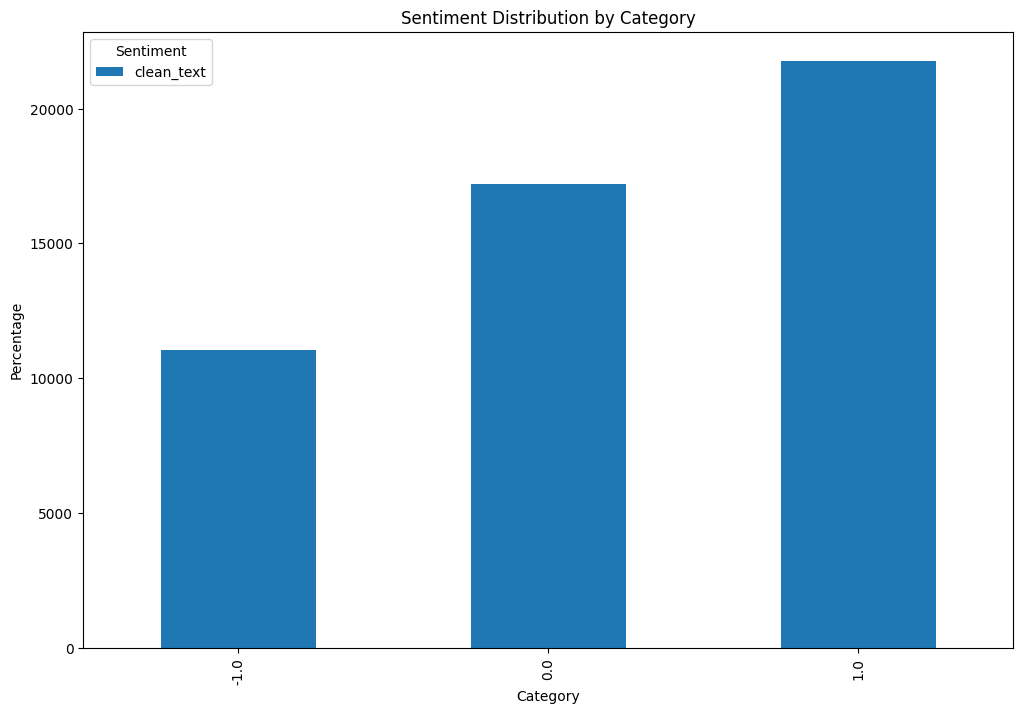

In [ ]:

category_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()
